In [13]:
# regresi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("rumah_jaksel.csv", encoding='windows-1252')
df

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...
1005,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [15]:
df = df.drop(columns=['NAMA RUMAH'])
df

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3
...,...,...,...,...,...,...
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0


In [16]:
df.info

<bound method DataFrame.info of             HARGA   LB   LT  KT  KM  GRS
0      3800000000  220  220   3   3    0
1      4600000000  180  137   4   3    2
2      3000000000  267  250   4   4    4
3       430000000   40   25   2   2    0
4      9000000000  400  355   6   5    3
...           ...  ...  ...  ..  ..  ...
1005   9000000000  450  550  10  10    3
1006   4000000000  160  140   4   3    2
1007   4000000000  139  230   4   4    1
1008  19000000000  360  606   7   4    0
1009  10500000000  420  430   7   4    2

[1010 rows x 6 columns]>

In [17]:
df['HARGA']=df['HARGA']/1000000000

In [18]:
df

,HARGA,LB,LT,KT,KM,GRS
0,3.80,220,220,3,3,0
1,4.60,180,137,4,3,2
2,3.00,267,250,4,4,4
3,0.43,40,25,2,2,0
4,9.00,400,355,6,5,3
...,...,...,...,...,...,...
1005,9.00,450,550,10,10,3
1006,4.00,160,140,4,3,2
1007,4.00,139,230,4,4,1
1008,19.00,360,606,7,4,0


In [19]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946,177.864557,179.957604,1.572776,1.420066,1.510998
min,0.430000,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000,350.000000,290.000000,5.000000,4.000000,2.000000
max,65.000000,1126.000000,1400.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

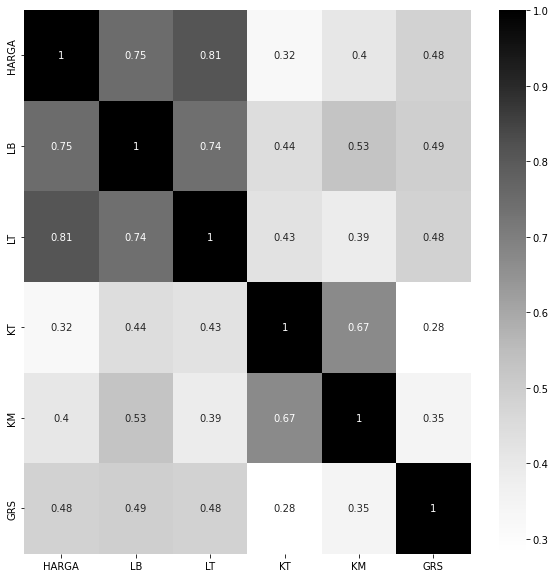

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap="Greys")

In [21]:
# data processing
from sklearn.model_selection import train_test_split

X = df.drop(columns="HARGA")
y = df.HARGA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((808, 5), (202, 5), (808,), (202,))

In [22]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [23]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("scaler", OneHotEncoder())
])

In [24]:
from sklearn.compose import ColumnTransformer

In [25]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['LB', 'LT', 'KT', 'KM','GRS']),
    ("categoric", categorical_pipeline, [])
])

### Modelling

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor(n_neighbors=10, weights='uniform'))
])

In [28]:
knn=pipeline.fit(X_train,y_train)

In [29]:
knn.score(X_train,y_train)

0.7316386274000573

In [30]:
knn.score(X_test,y_test)

0.7178508918503419

### Training

In [31]:
from sklearn.model_selection import GridSearchCV
parameter = {
    "algo__n_neighbors": range(1, 51, 2),
    "algo__weights": ['uniform', 'distance']
}

In [33]:
knn=GridSearchCV(pipeline,param_grid=parameter,cv=5,n_jobs=1,verbose=1)
knn.fit(X_train,y_train)
print(knn.best_params_)
print(knn.score(X_train,y_train),knn.score(X_test,y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__n_neighbors': 17, 'algo__weights': 'distance'}
0.9978570403114264 0.752948942377777


### Test

In [40]:
soal_test_random = pd.DataFrame({'LB': [48],
                                'LT': [72],
                                 'KT': [2],
                                 'KM': [1],
                                 'GRS': [1],
                                 })
soal_test_random

,LB,LT,KT,KM,GRS
0,48,72,2,1,1


In [41]:
prediksi = knn.predict(soal_test_random)
print(prediksi)


[1.89464704]


In [42]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [44]:
print("Test RMSE :", np.sqrt(mean_squared_error(y_test,knn.predict(X_test))))
print("Train RMSE :", np.sqrt(mean_squared_error(y_train,knn.predict(X_train))))
print("R2 Test :", r2_score(y_test,knn.predict(X_test)))

Test RMSE : 3.39603264794099
Train RMSE : 0.34519891879444486
R2 Test : 0.752948942377777


In [45]:
print("Test MAE :",mean_absolute_error(y_test,knn.predict(X_test)))
print("Train MAE :",mean_absolute_error(y_train,knn.predict(X_train)))

Test MAE : 1.8577128794752573
Train MAE : 0.04609777186468647


In [46]:
print("Test MAE :",mean_squared_error(y_test,knn.predict(X_test)))
print("Train MAE :",mean_squared_error(y_train,knn.predict(X_train)))

Test MAE : 11.533037745881092
Train MAE : 0.11916229353685376
